In [1]:
import cv2
import os
import numpy as np
import pywt
import time
from math import floor
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from Utility import arnoldTransform, arnoldInverseTransform

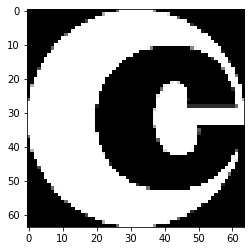

In [2]:
wm_img = cv2.imread("./wms/wm.png", 0)
wm_img.shape
plt.imshow(wm_img, cmap='Greys') 
plt.show()

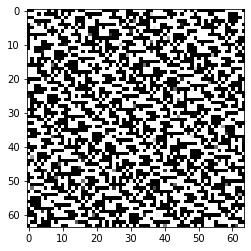

In [3]:
# arnoldTransform process
a = 6
b = 40
key = 33
wm_ar = arnoldTransform(wm_img, key)
wm_ar.shape
plt.imshow(wm_ar, cmap='Greys') 
plt.show()
#print(wm_ar)

(512, 512, 3)
Calculation time: 31.539201736450195 ms


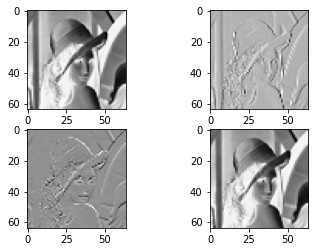

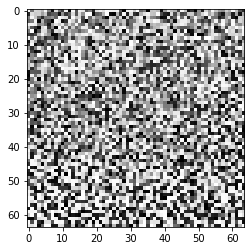

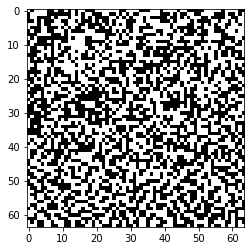

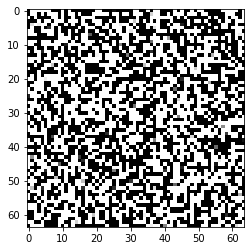

(512, 512, 3)
Calculation time: 48.86221885681152 ms


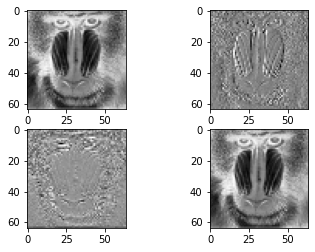

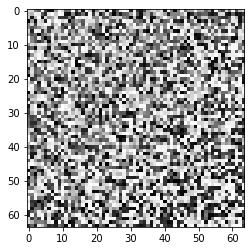

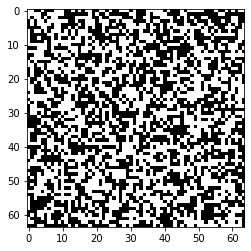

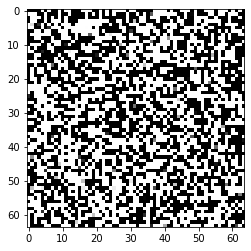

(512, 512, 3)
Calculation time: 33.17880630493164 ms


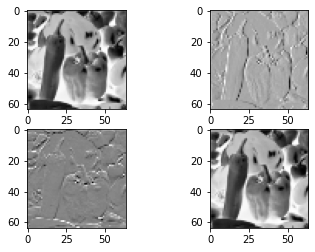

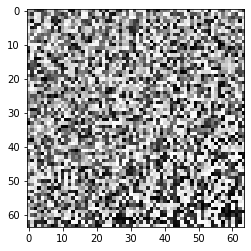

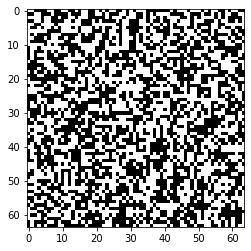

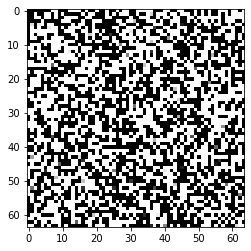

In [4]:
# Zero-Watermarking Embedding
folder_path = "./imgs"
output_path = "./outputs"
os_path     = "./os_img"
ms_path     = "./ms_img"

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".bmp"):
        # Load image
        img_path = os.path.join(folder_path, filename)
        ori_img = cv2.imread(img_path)
        img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2YCrCb)
        Y_split = img[:,:,0]
        print(ori_img.shape)
        img1 = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
        outname = './outputs/'+'dwt_'+filename

        time_start=time.time()
        coeffs = pywt.wavedec2(np.array(Y_split), wavelet='haar',level=3)
        LL, [LH3,HL3,HH3],[LH2,HL2,HH2],[LH1,HL1,HH1] = coeffs

        plt.subplot(2,2,1)
        plt.imshow(LL, cmap="Greys")
        plt.subplot(2,2,2)
        plt.imshow(HL3, cmap="Greys")
        plt.subplot(2,2,3)
        plt.imshow(LH3, cmap="Greys")
        plt.subplot(2,2,4)
        plt.imshow(HH3, cmap="Greys")

        time_end=time.time()
        print('Calculation time:', (time_end - time_start)*1000,'ms')
        cv2.imwrite(outname, np.uint8(LL))
        
        plt.imshow(LL, cmap='Greys') 
        plt.show()
        dct_img = cv2.dct(LL, cv2.DCT_ROWS)
        
        # convert to uint8
        img1 = np.uint8(dct_img)
        
        # master share
        ms_img = img1
        plt.imshow(img1, cmap='Greys') 
        plt.show()
        for i in range(img1.shape[0]):
            for j in range(img1.shape[1]):
                if (img1[i][j] >= 128):
                    ms_img[i][j] = 255
                else: 
                    ms_img[i][j] = 0

        plt.imshow(ms_img, cmap='Greys') 
        plt.show()
        outname = './ms_img/'+'ms_' + filename
        cv2.imwrite(outname, ms_img)
        
        #owner share (os) 
        os_img = img1
        for i in range(img1.shape[0]):
            for j in range(img1.shape[1]):
                    os_img[i][j] = ms_img[i][j] ^ wm_ar[i][j]

        plt.imshow(os_img, cmap='Greys') 
        plt.show()        

        outname = './os_img/'+'os_' + filename
        cv2.imwrite(outname, os_img)